In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [4]:

df_league=pd.read_csv("england-premier-league-league-2018-to-2019-stats.csv")
df_league

,name,season,status,format,number_of_clubs,total_matches,matches_completed,game_week,total_game_week,progress,average_goals_per_match,average_scored_home_team,average_scored_away_team,btts_percentage,clean_sheets_percentage,prediction_risk,home_scored_advantage_percentage,home_defence_advantage_percentage,home_advantage_percentage,average_corners_per_match,average_corners_per_match_home_team,average_corners_per_match_away_team,total_corners_for_season,average_cards_per_match,average_cards_per_match_home_team,average_cards_per_match_away_team,total_cards_for_season,over_05_percentage,over_15_percentage,over_25_percentage,over_35_percentage,over_45_percentage,over_55_percentage,under_05_percentage,under_15_percentage,under_25_percentage,under_35_percentage,under_45_percentage,under_55_percentage,over_65_corners_percentage,over_75_corners_percentage,over_85_corners_percentage,over_95_corners_percentage,over_105_corners_percentage,over_115_corners_percentage,over_125_corners_percentage,over_135_corners_percentage,over_05_cards_percentage,over_15_cards_percentage,over_25_cards_percentage,over_35_cards_percentage,over_45_cards_percentage,over_55_cards_percentage,over_65_cards_percentage,over_75_cards_percentage,goals_min_0_to_10,goals_min_11_to_20,goals_min_21_to_30,goals_min_31_to_40,goals_min_41_to_50,goals_min_51_to_60,goals_min_61_to_70,goals_min_71_to_80,goals_min_81_to_90,goals_min_0_to_15,goals_min_16_to_30,goals_min_31_to_45,goals_min_46_to_60,goals_min_61_to_75,goals_min_76_to_90,xg_avg_per_match
0,Premier League,2018/2019,Completed,NaN,20,380,380,38,38,100,2.82,1.57,1.25,51,54,73,26,20,23,10.28,5.73,4.56,3907,3.46,1.62,1.84,1315,94,80,54,32,14,6,6,20,46,68,86,94,88,81,70,59,47,35,27,16,93,86,67,44,28,16,8,3,82,116,108,98,118,112,133,119,186,134,172,170,158,185,253,2.8


In [5]:
df_teams=pd.read_csv("england-premier-league-teams-2018-to-2019-stats.csv")
print(df_teams.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 293 entries, team_name to over145_corners_percentage
dtypes: float64(36), int64(253), object(4)
memory usage: 45.9+ KB
None


In [6]:

df_players=pd.read_csv("england-premier-league-players-2018-to-2019-stats.csv")
print(df_players.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   full_name                       572 non-null    object 
 1   age                             572 non-null    int64  
 2   birthday                        572 non-null    int64  
 3   birthday_GMT                    572 non-null    object 
 4   league                          572 non-null    object 
 5   season                          572 non-null    object 
 6   position                        572 non-null    object 
 7   Current Club                    572 non-null    object 
 8   minutes_played_overall          572 non-null    int64  
 9   minutes_played_home             572 non-null    int64  
 10  minutes_played_away             572 non-null    int64  
 11  nationality                     572 non-null    object 
 12  appearances_overall             572 

In [7]:

corrMat=df_players.corr(method='pearson')
corrMat

,age,birthday,minutes_played_overall,minutes_played_home,minutes_played_away,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
age,1.000000,-0.786944,0.216921,0.203986,0.225990,0.208692,0.200710,0.211814,0.066099,0.065653,0.054811,0.049917,0.046891,0.041101,0.068576,0.029431,0.172831,0.148964,0.176510,0.202597,0.195877,0.195394,0.149165,0.055202,-0.010060,-0.014491,0.023461,0.079474,-0.009936,0.080090,0.157208,0.186401,0.321746,0.141012,0.111867,0.129338,0.198783,0.205600,0.158229,0.124382
birthday,-0.786944,1.000000,-0.177715,-0.165092,-0.187201,-0.163611,-0.157509,-0.165903,-0.049972,-0.052441,-0.037707,-0.026072,-0.024900,-0.020962,-0.064564,-0.021682,-0.136264,-0.113076,-0.144488,-0.164845,-0.159593,-0.158809,-0.122563,-0.047016,0.022052,0.023207,-0.003970,-0.064536,0.029046,-0.060550,-0.108444,-0.144018,-0.270500,-0.113696,-0.092218,-0.109072,-0.162824,-0.170701,-0.140948,-0.176858
minutes_played_overall,0.216921,-0.177715,1.000000,0.990848,0.990569,0.948743,0.935342,0.939940,0.446227,0.406300,0.419122,0.478883,0.413854,0.438789,0.233127,0.151314,0.760927,0.749410,0.663196,0.898169,0.862752,0.870862,0.629243,0.214714,0.002836,-0.032228,0.195718,0.176090,0.194069,0.471755,0.113228,0.398578,0.780261,0.574654,0.501838,0.092295,0.441608,0.430770,0.278268,-0.029181
minutes_played_home,0.203986,-0.165092,0.990848,1.000000,0.963008,0.940103,0.941884,0.916249,0.450869,0.418281,0.413170,0.481827,0.422943,0.433397,0.236146,0.155534,0.752624,0.751400,0.643579,0.889203,0.873063,0.846626,0.628362,0.205915,0.005225,-0.030855,0.201339,0.180774,0.195738,0.458684,0.106723,0.389739,0.769549,0.571046,0.504915,0.094421,0.432154,0.420412,0.271403,-0.036214
minutes_played_away,0.225990,-0.187201,0.990569,0.963008,1.000000,0.939750,0.911190,0.946392,0.433160,0.386532,0.417316,0.466929,0.396880,0.436047,0.225699,0.144198,0.755110,0.733361,0.670693,0.890456,0.836134,0.879159,0.618357,0.219627,0.000358,-0.033017,0.186349,0.168038,0.188741,0.476192,0.117712,0.400088,0.776526,0.567558,0.489319,0.088408,0.442937,0.433221,0.280026,-0.021497
appearances_overall,0.208692,-0.163611,0.948743,0.940103,0.939750,1.000000,0.988349,0.988236,0.490234,0.443303,0.464534,0.517617,0.452631,0.467726,0.228645,0.152644,0.797008,0.787536,0.691486,0.849621,0.817204,0.822897,0.601632,0.200131,0.027417,-0.025529,0.297552,0.264733,0.286560,0.462344,0.144718,0.473759,0.711553,0.568455,0.497194,0.117993,0.414259,0.419852,0.185584,-0.036525
appearances_home,0.200710,-0.157509,0.935342,0.941884,0.911190,0.988349,1.000000,0.953445,0.482785,0.443985,0.447610,0.515048,0.453887,0.461076,0.222910,0.160492,0.784226,0.790962,0.660845,0.840298,0.823465,0.801362,0.594876,0.190077,0.024346,-0.027764,0.292379,0.265118,0.273650,0.446742,0.135044,0.464197,0.696418,0.561367,0.500027,0.118833,0.407106,0.412820,0.181440,-0.034462
appearances_away,0.211814,-0.165903,0.939940,0.916249,0.946392,0.988236,0.953445,1.000000,0.486212,0.432212,0.470636,0.508050,0.440745,0.463431,0.229040,0.141175,0.791144,0.765609,0.706045,0.839047,0.791733,0.825222,0.594299,0.205537,0.029860,-0.022684,0.295766,0.258132,0.292808,0.467169,0.151042,0.472247,0.710059,0.562234,0.482676,0.114380,0.411723,0.417063,0.185391,-0.037741
goals_overall,0.066099,-0.049972,0.446227,0.450869,0.433160,0.490234,0.482785,0.486212,1.000000,0.942793,0.896344,0.579885,0.519520,0.508620,0.555861,0.320097,0.483180,0.459491,0.44

In [12]:
corrMat.sort_values(by='age',ascending=False)['age']

age                               1.000000
min_per_match                     0.321746
minutes_played_away               0.225990
minutes_played_overall            0.216921
appearances_away                  0.211814
appearances_overall               0.208692
rank_in_league_top_midfielders    0.205600
minutes_played_home               0.203986
conceded_overall                  0.202597
appearances_home                  0.200710
rank_in_league_top_attackers      0.198783
conceded_home                     0.195877
conceded_away                     0.195394
min_per_conceded_overall          0.186401
clean_sheets_away                 0.176510
clean_sheets_overall              0.172831
rank_in_league_top_defenders      0.158229
conceded_per_90_overall           0.157208
yellow_cards_overall              0.149165
clean_sheets_home                 0.148964
min_per_card_overall              0.141012
cards_per_90_overall              0.129338
rank_in_club_top_scorer           0.124382
min_per_ass

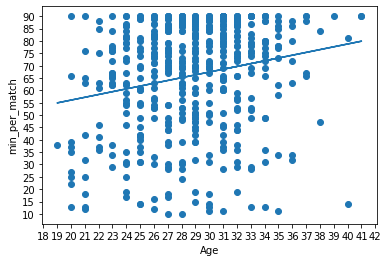

In [21]:
df_players=df_players[df_players['age']!=0]
df_players=df_players[df_players['min_per_match']>=10]

x=df_players['age']
y=df_players['min_per_match']
m, b = np.polyfit(x, y, 1)

plt.scatter(df_players['age'],df_players['min_per_match'])
plt.xticks(np.arange(min(df_players.age)-2,max(df_players.age)+2,1))
plt.yticks(np.arange(min(df_players.min_per_match),max(df_players.min_per_match)+2,5))
plt.plot(x, m*x+b)
plt.xlabel("Age")
plt.ylabel("min_per_match")

plt.show()

In [22]:
corrMatTeams=df_teams.corr(method='pearson')
corrMatTeams

,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,wins_away,draws,draws_home,draws_away,losses,losses_home,losses_away,points_per_game,points_per_game_home,points_per_game_away,league_position,league_position_home,league_position_away,performance_rank,goals_scored,goals_conceded,goal_difference,total_goal_count,total_goal_count_home,total_goal_count_away,goals_scored_home,goals_scored_away,goals_conceded_home,goals_conceded_away,goal_difference_home,goal_difference_away,minutes_per_goal_scored,minutes_per_goal_scored_home,minutes_per_goal_scored_away,minutes_per_goal_conceded,minutes_per_goal_conceded_home,minutes_per_goal_conceded_away,clean_sheets,clean_sheets_home,clean_sheets_away,btts_count,btts_count_home,btts_count_away,fts_count,fts_count_home,fts_count_away,first_team_to_score_count,first_team_to_score_count_home,first_team_to_score_count_away,corners_total,corners_total_home,corners_total_away,cards_total,cards_total_home,cards_total_away,average_possession,average_possession_home,average_possession_away,shots,shots_home,shots_away,shots_on_target,shots_on_target_home,shots_on_target_away,shots_off_target,shots_off_target_home,shots_off_target_away,fouls,fouls_home,fouls_away,goals_scored_half_time,goals_scored_half_time_home,goals_scored_half_time_away,goals_conceded_half_time,goals_conceded_half_time_home,goals_conceded_half_time_away,goal_difference_half_time,goal_difference_half_time_home,goal_difference_half_time_away,leading_at_half_time,leading_at_half_time_home,leading_at_half_time_away,draw_at_half_time,draw_at_half_time_home,draw_at_half_time_away,losing_at_half_time,losing_at_half_time_home,losing_at_half_time_away,points_per_game_half_time,points_per_game_half_time_home,points_per_game_half_time_away,average_total_goals_per_match,average_total_goals_per_match_home,average_total_goals_per_match_away,goals_scored_per_match,goals_scored_per_match_home,goals_scored_per_match_away,goals_conceded_per_match,goals_conceded_per_match_home,goals_conceded_per_match_away,total_goals_per_match_half_time,total_goals_per_match_half_time_home,total_goals_per_match_half_time_away,goals_scored_per_match_half_time,goals_scored_per_match_half_time_home,goals_scored_per_match_half_time_away,goals_conceded_per_match_half_time,goals_conceded_per_match_half_time_home,goals_conceded_per_match_half_time_away,over05_count,over15_count,over25_count,over35_count,over45_count,over55_count,over05_count_home,over15_count_home,over25_count_home,over35_count_home,over45_count_home,over55_count_home,over05_count_away,over15_count_away,over25_count_away,over35_count_away,over45_count_away,over55_count_away,under05_count,under15_count,under25_count,under35_count,under45_count,under55_count,under05_count_home,under15_count_home,under25_count_home,under35_count_home,under45_count_home,under55_count_home,under05_count_away,under15_count_away,under25_count_away,under35_count_away,under45_count_away,under55_count_away,over05_percentage,over15_percentage,over25_percentage,over35_percentage,over45_percentage,over55_percentage,over05_percentage_home,over15_percentage_home,over25_percentage_home,over35_percentage_home,over45_percentage_home,over55_percentage_home,over05_percentage_away,over15_percentage_away,over25_percentage_away,over35_percentage_away,over45_percentage_away,over55_percentage_away,under05_percentage,under15_percentage,under25_percentage,under35_percentage,under45_percentage,under55_percentage,under05_percentage_home,under15_percentage_home,under25_percentage_home,under35_percentage_home,under45_percentage_home,under55_percentage_home,under05_percentage_away,under15_percentage_away,under25_percentage_away,under35_percentage_away,under45_percentage_away,under55_percentage_away,over05_count_half_time,over15_count_half_time,over25_count_half_time,over05_count_half_time_home,over15_count_half_time_home,over25_count_half_time_home,over05_count_half_time_away,over15_count_half_time_away,over25_count_h

In [24]:
corrMatTeams.sort_values(by='league_position',ascending=False).league_position

performance_rank           1.000000
league_position            1.000000
loss_percentage_ovearll    0.946964
losses                     0.944333
league_position_home       0.942857
                             ...   
points_per_game           -0.954118
matches_played                  NaN
matches_played_home             NaN
matches_played_away             NaN
suspended_matches               NaN
Name: league_position, Length: 289, dtype: float64

Text(0, 0.5, 'Goals conceded')

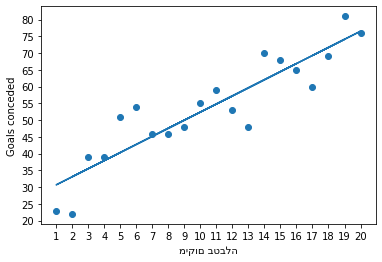

In [26]:

x=df_teams['league_position']
y=df_teams['goals_conceded']
m, b = np.polyfit(x, y, 1)

plt.scatter(df_teams['league_position'],df_teams['goals_conceded'])
plt.xticks(np.arange(min(df_teams['league_position'])-2,max(df_teams['league_position'])+2,1))
plt.yticks(np.arange(min(df_teams['goals_conceded'])-2,max(df_teams['goals_conceded'])+2,5))
plt.plot(x, m*x+b)
plt.xlabel("מיקום בטבלה")
plt.ylabel("Goals conceded")
